In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# directory = '/home/luluvyd/examples/data/'
directory = '/home/luluvyd/corpus/Reuters21578/'
# filename = '/home/luluvyd/examples/data/'

In [3]:
nlp = spacy.load('en_core_web_md')

def analyzePOS(doc):  
    '''
    parameter : doc is an article by a single author
    return : counter of POS tags
    '''
    counter = Counter([token.pos_ for token in doc])
    return counter

def rankCounter(counter): 
    '''
    parameter : counter of an article by a single author
    '''
    if len(counter) == 0:
        return None, None
    else:
        c = counter.most_common(20)
        return zip(*c)

def sumCounter(counter): 
    '''
    parameter : counter
    return : sum of counter values
    '''
    return sum(counter.values())

    
def analyzeSentence(doc):
    '''
    parameter : doc is an article by a single author
    assume sentence length is measured by number of words
    return : counter of sentence lengths'''
    lengths = Counter([len(sentence) for sentence in doc.sents])
    for sentence in doc.sents: 
        print("SENTENCE : " + sentence.text)
    return lengths

def analyzeWordLength(doc): 
    '''parameter : doc is an article by a single author
    return : counter of word lengths
    '''
    counter = Counter([len(token.lemma_) for token in doc])
    return counter

def analyzePunctuation(doc): 
    '''parameter: doc is an article by a single author
    return : counter of punctuation symbols '''
    counter = Counter([token.text for token in doc if token.pos_=='PUNCT'])
    return counter

def analyzePronoun(doc): 
    '''parameter: doc is an article by a single author
    return : counter of all pronoun '''
    counter = Counter([token.text.lower() for token in doc if (token.tag_== 'PRP' or 
                       token.tag_== 'PRP$' or 
                       token.tag_== 'WP' or 
                       token.tag_== 'WP$')])
    return counter

def analyzePronounPRP(doc):
    '''parameter: doc is an article by a single author
    return : counter of PRP '''
    counter = Counter([token.text.lower() for token in doc if token.tag_== 'PRP'])
    return counter

def analyzePronounPRPD(doc):
    '''parameter: doc is an article by a single author
    return : counter of PRP '''
    counter = Counter([token.text.lower() for token in doc if token.tag_== 'PRP$'])
    return counter

def analyzePronounWP(doc):
    '''parameter: doc is an article by a single author
    return : counter of WP '''
    counter = Counter([token.text.lower() for token in doc if token.tag_== 'WP'])
    return counter

def analyzePronounWPD(doc):
    '''parameter: doc is an article by a single author
    return : counter of WP$ '''
    counter = Counter([token.text.lower() for token in doc if token.tag_== 'WP$'])
    return counter

def analyzePronounCategories(doc):
    '''parameter: doc is an article by a single author
    return : counter of all pronoun categories '''
    counter = Counter([token.tag_ for token in doc if (token.tag_== 'PRP' or 
                       token.tag_== 'PRP$' or 
                       token.tag_== 'WP' or 
                       token.tag_== 'WP$')])
    return counter

def analyzeVerb(doc): 
    '''parameter: doc is an article by a single author
    return : counter of verb words '''
    counter = Counter([token.lemma_ for token in doc if token.pos_=='VERB'])
    return counter

def analyzeVerbRoot(doc): 
    '''parameter: doc is an article by a single author
    return : counter of verb words '''
    counter = Counter([token.lemma_ for token in doc if token.pos_=='VB'])
    return counter

In [17]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzePOS(doc)
print(counter)

Counter({'DET': 3, 'PUNCT': 2, 'VERB': 2, 'NOUN': 2, 'ADV': 1, 'ADJ': 1})


In [5]:
import pyspark
import sys
from os import listdir
from os.path import isfile, join


In [30]:
read_files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f))]

In [31]:
read_files

['/home/luluvyd/corpus/Reuters21578/reut2-012.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-006.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-005.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-021.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-009.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-007.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-019.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-004.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-002.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-014.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-011.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-003.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-020.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-010.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-016.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-000.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-008.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-001.sgm',
 '/home/luluvyd/corpus/Reuters21578/reut2-013.sgm',
 '/home/lulu

In [ ]:
counter = Counter('')
for infile in read_files:
    with open(infile, 'r') as f:
        text = f.read()
        texts = iter([text])
        i = 0 
        for doc in nlp.pipe(texts, n_threads=16, batch_size=10000):
            counter += analyzeVerb(doc)
            print(i)
            i += 1


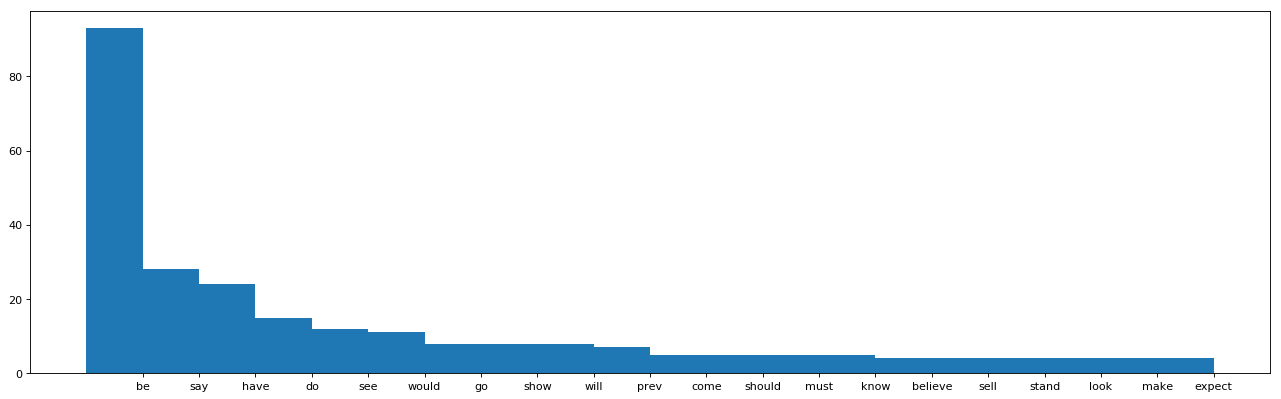

In [26]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()